## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## Read Data ( .csv )

In [2]:
train = pd.read_csv('FIFA_train.csv')
test = pd.read_csv('FIFA_test.csv')
submission  = pd.read_csv('submission.csv')

- id : 선수 고유의 아이디
- name : 이름
- age : 나이
- continent : 선수들의 국적이 포함되어 있는 대륙입니다
- contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
- position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
- prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
- reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
- stat_overall : 선수의 현재 능력치 입니다.
- stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
- stat_skill_moves : 선수의 개인기 능력치 입니다.
- value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 
-----------------------------------------------------------------------------------
- Numerical = [ age , stat_overall , stat_potential , vlaue ]
- Categorical = [id , name , continent , contract_until , position , prefer_foot , reputation , stat_skill_moves ]
-----------------------------
이적 시장 가격의 편차가 굉장히 큼
분석을 진행할때 log scale의 value도 target으로 시도하는 것도 의미있을듯함
log scale 임에도 불구하고 이상치가 있음. log scale 기준 10~18까지 데이터만 사용

In [3]:
# tarin 데이터
train.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [4]:
# test 데이터
test.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [5]:
# submission 데이터
submission.head(5)

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [6]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


## Train 데이터 분포 시각화

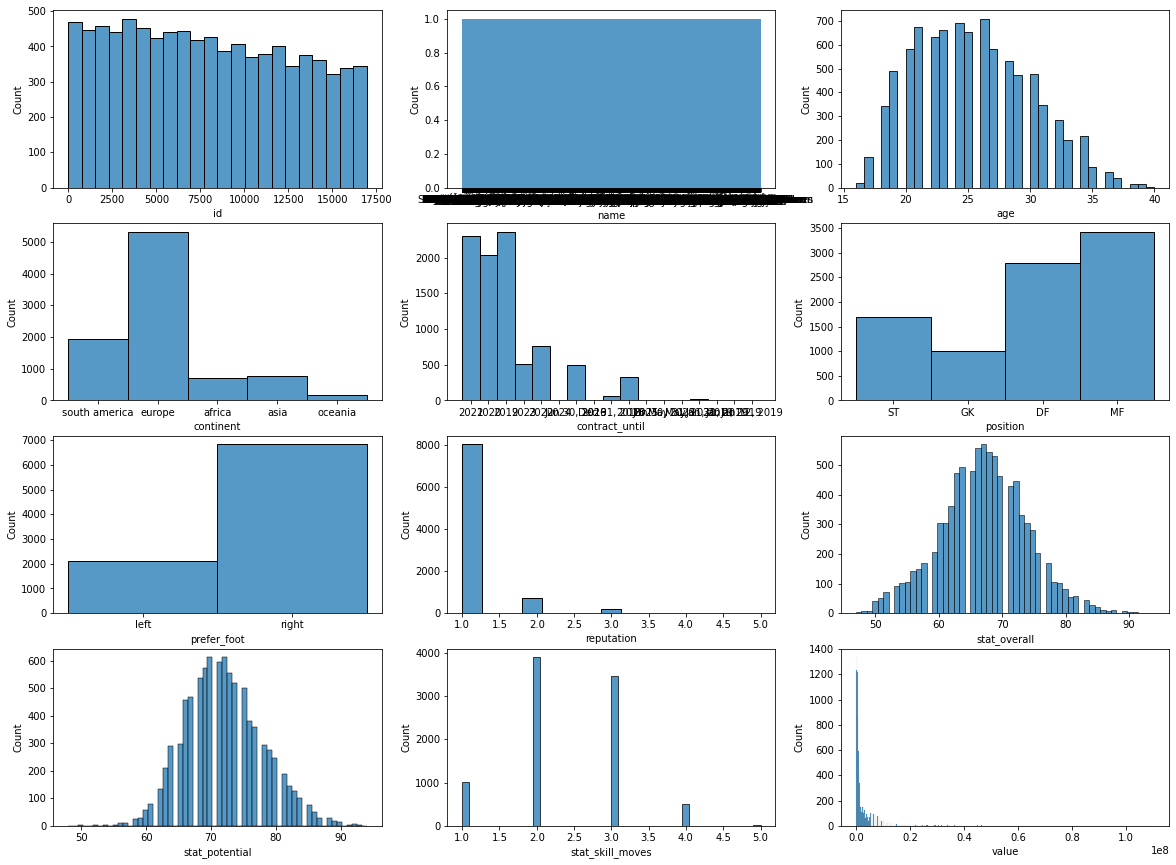

In [7]:
f, axes = plt.subplots(4,3 , figsize=(20,15))
axes = axes.flatten()
for col, ax in zip(train.columns, axes):
    sns.histplot(data=train, x=col, ax=ax)
plt.show()

## Train 연속형(숫자형) 데이터 열의 상관 계산 분석

- 상관관계 분석을 통해서 선수 가치에 많은 영향을 줄 수 있는 데이터를 찾을 수 있음.
- 상대적으로 선수의 명성도와 현재 능력치와 앞으로의 발전 정도가 상관관계가 높은 평이었으나, 이것만 보기에는 애매한 감이 있음.
- 의외로 나이에 대한 가치 기대값이 낮은 것을 알 수 있음
- 축구구단도 이윤을 추구해야하는 축구사업이기 때문에 이름값과 그에 맞는 현재 폼이 선수 가치에 많은 영향을 주지 않았나 생각이 듬.

In [8]:
# corr = NA/null 값을 제외한 열의 쌍별 상관 계산
train.corr().style.background_gradient(cmap='Blues_r')

"""train 데이터를 분석해 봤을 때 현재폼과 포텐셜이 가장 높은 상관 관계를 보인다. """

'train 데이터를 분석해 봤을 때 현재폼과 포텐셜이 가장 높은 상관 관계를 보인다. '

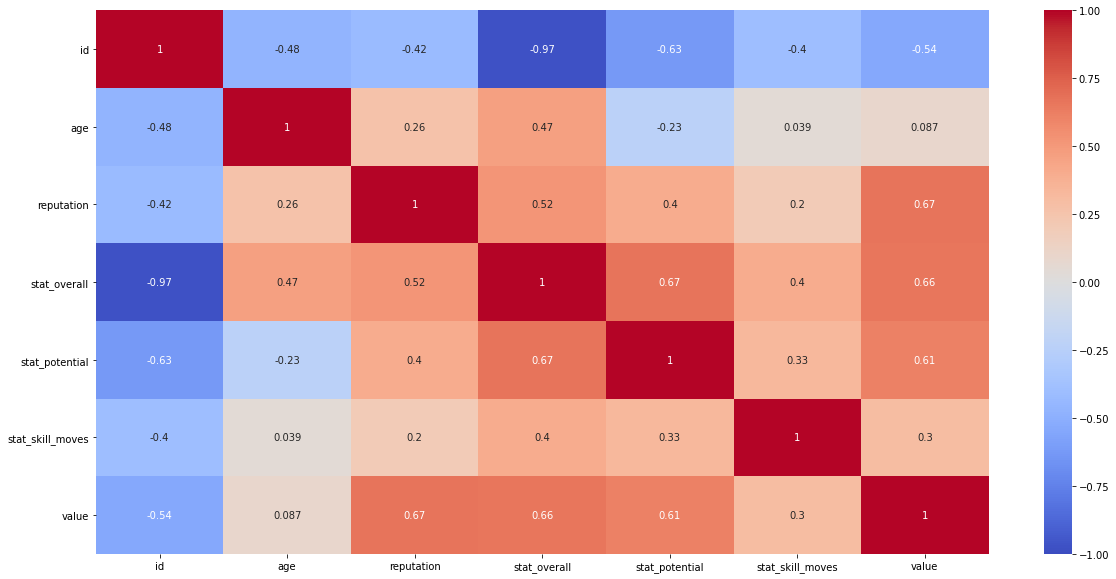

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

## Test 데이터의 열의 상관 관계 분석

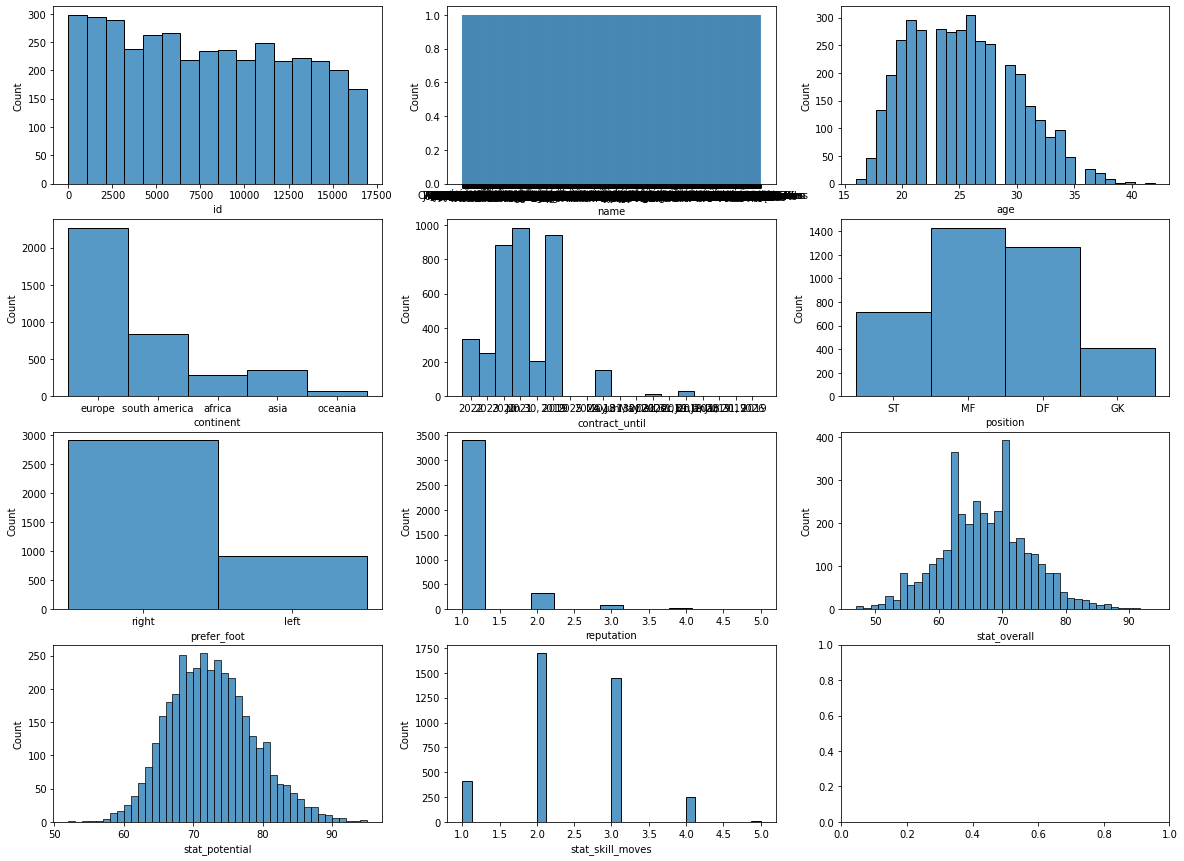

In [10]:
f, axes = plt.subplots(4,3 , figsize=(20,15))
axes = axes.flatten()
for col, ax in zip(test.columns, axes):
    sns.histplot(data=test, x=col, ax=ax)
plt.show()

In [11]:
# corr = NA/null 값을 제외한 열의 쌍별 상관 계산
test.corr().style.background_gradient(cmap='Blues_r')

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
id,1.000000,-0.444101,-0.436237,-0.970117,-0.647958,-0.422232
age,-0.444101,1.000000,0.247366,0.432210,-0.245190,0.015834
reputation,-0.436237,0.247366,1.000000,0.548038,0.424418,0.258396
stat_overall,-0.970117,0.432210,0.548038,1.000000,0.687245,0.431102
stat_potential,-0.647958,-0.245190,0.424418,0.687245,1.000000,0.375556
stat_skill_moves,-0.422232,0.015834,0.258396,0.431102,0.375556,1.000000


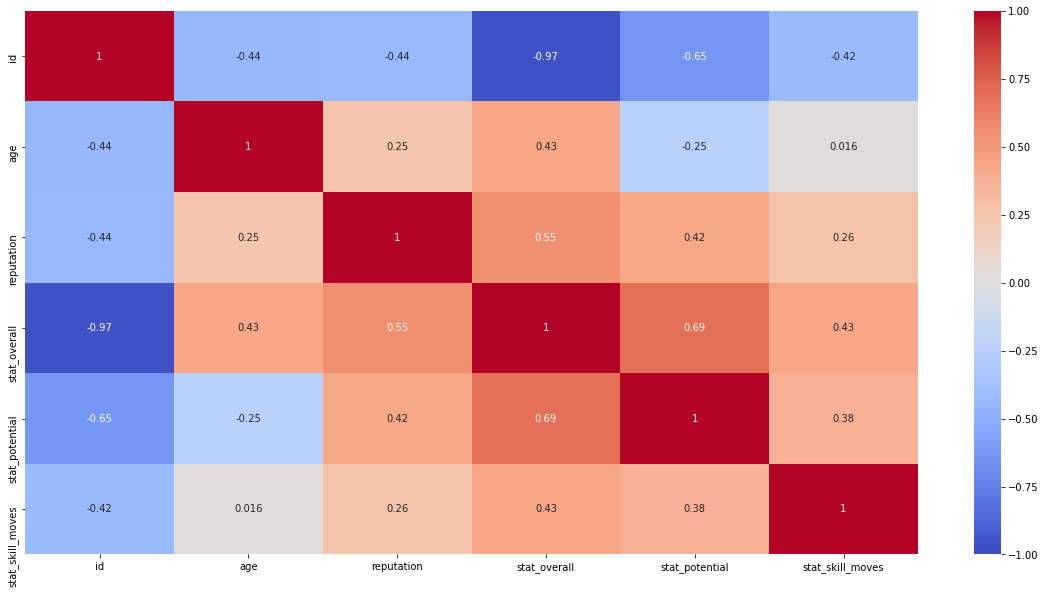

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(test.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

## 필요없는 column 제거하기

In [13]:
train.drop(['id', 'name'], axis = 1, inplace = True)
test.drop(['id', 'name'], axis = 1, inplace = True)

In [14]:
train.contract_until.value_counts() # 계약기간의 value_counts()로 정렬해준다.

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [15]:
# 계약 연도를 object -> int 로 변환
def func(string:object) -> int:
    """계약 연도만 추출하여 int로 반환"""
    string = string[-4:] # 계약연도가 제일 끝에 있거나 단독으로 쓰이고 있어 뒤에서 4번째부터 가지고 옴.
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 697.9+ KB


## Train data 중 숫자 자료형 외의 기술 통계

In [17]:
train.describe(include='object')

,continent,position,prefer_foot
count,8932,8932,8932
unique,5,4,2
top,europe,MF,right
freq,5322,3428,6837


In [18]:
# train data 이산형 자료의 value_counts() 해줌
for col in ['continent' , 'position', 'prefer_foot']:
    print(col)
    print(train[col].value_counts())

continent
europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64
position
MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64
prefer_foot
right    6837
left     2095
Name: prefer_foot, dtype: int64


## Categorical  col (문자형 변수 label) 인코딩 진행

In [19]:
# categorical data를 담고있는 Series는 특수 메서드인 cat 속성이 있다.
# 이를 통해 catagories 와 codes 나 categorical 메서드 등에 쉽게 접근할 수 있다.
# 하지만 시리즈에 바로 categories나 codes를 사용하면 에러가 발생하는데 이때 이용하는 것이 cat 속성이다.

train['continent']=train['continent'].astype('category').cat.codes
test['continent'] = test['continent'].astype('category').cat.codes

train['position'] = train['position'].astype('category').cat.codes
test['position'] = test['position'].astype('category').cat.codes

train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes
test['prefer_foot'] = test['prefer_foot'].astype('category').cat.codes

In [20]:
# reputation, stat_skill_moves 를 float -> int 변환
train['reputation'] = train['reputation'].astype(int)
test['reputation'] = test['reputation'].astype(int)

train['stat_skill_moves'] = train['stat_skill_moves'].astype(int)
test['stat_skill_moves'] = test['stat_skill_moves'].astype(int)

In [21]:
train.head(5)

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,4,2021,3,0,5,94,94,4,110500000.0
1,27,2,2020,1,1,4,91,93,1,72000000.0
2,31,4,2021,3,1,5,91,91,3,80000000.0
3,32,2,2020,0,1,4,91,91,3,51000000.0
4,25,2,2021,1,1,3,90,93,1,68000000.0


In [22]:
test.head(5)

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,2022,3,1,5,94,94,5
1,26,4,2022,3,1,5,92,93,5
2,27,2,2023,2,1,4,91,92,4
3,27,2,2020,3,1,4,91,91,4
4,32,2,2020,2,1,4,91,91,4


In [23]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   int8   
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   int8   
 4   prefer_foot       8932 non-null   int8   
 5   reputation        8932 non-null   int32  
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   int32  
 9   value             8932 non-null   float64
dtypes: float64(1), int32(2), int64(4), int8(3)
memory usage: 445.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               3828 non-null   int64
 1   continent   

(None, None)

In [24]:
from sklearn.model_selection import train_test_split
X = train.drop(['value'],axis=1)
y = train['value']

In [25]:
train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,4,2021,3,0,5,94,94,4,110500000.0
1,27,2,2020,1,1,4,91,93,1,72000000.0
2,31,4,2021,3,1,5,91,91,3,80000000.0
3,32,2,2020,0,1,4,91,91,3,51000000.0
4,25,2,2021,1,1,3,90,93,1,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,0,2019,2,1,1,48,63,3,60000.0
8928,19,2,2020,0,1,1,47,59,2,40000.0
8929,18,4,2021,0,1,1,47,64,2,50000.0
8930,18,2,2021,1,1,1,47,65,1,50000.0


In [26]:
test

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,2022,3,1,5,94,94,5
1,26,4,2022,3,1,5,92,93,5
2,27,2,2023,2,1,4,91,92,4
3,27,2,2020,3,1,4,91,91,4
4,32,2,2020,2,1,4,91,91,4
...,...,...,...,...,...,...,...,...,...
3823,20,1,2021,2,1,1,48,63,2
3824,18,2,2018,1,1,1,48,65,1
3825,18,4,2021,2,1,1,48,65,2
3826,18,2,2020,3,1,1,47,61,2


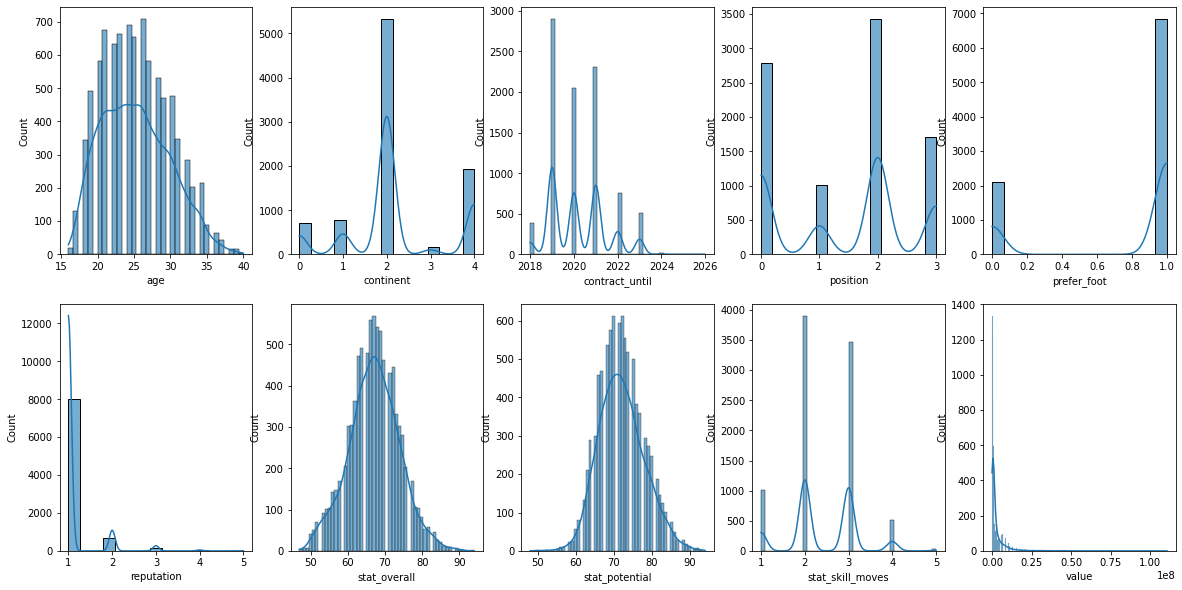

In [27]:
f, axes = plt.subplots(2,5, figsize=(20,10))
axes = axes.flatten()
for col,ax in zip(train.columns, axes):
    sns.histplot(data = train, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

# 전처리 방법 

In [28]:
test

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,2022,3,1,5,94,94,5
1,26,4,2022,3,1,5,92,93,5
2,27,2,2023,2,1,4,91,92,4
3,27,2,2020,3,1,4,91,91,4
4,32,2,2020,2,1,4,91,91,4
...,...,...,...,...,...,...,...,...,...
3823,20,1,2021,2,1,1,48,63,2
3824,18,2,2018,1,1,1,48,65,1
3825,18,4,2021,2,1,1,48,65,2
3826,18,2,2020,3,1,1,47,61,2


In [29]:
submission

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
3823,16924,0
3824,16929,0
3825,16932,0
3826,16937,0
